## Simple Linear Regression
This notebook shows the implementation of a linear regression model using different approaches

The case-study involves using SAT scores to predict university GPA 

#### Import relevant libraries 

In [1]:
import pandas as pd 
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
sns.set()

/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Read the data into a pandas dataframe

In [2]:
df = pd.read_csv("SAT-GPA.csv")

#### Examining the data

In [3]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


<AxesSubplot:>

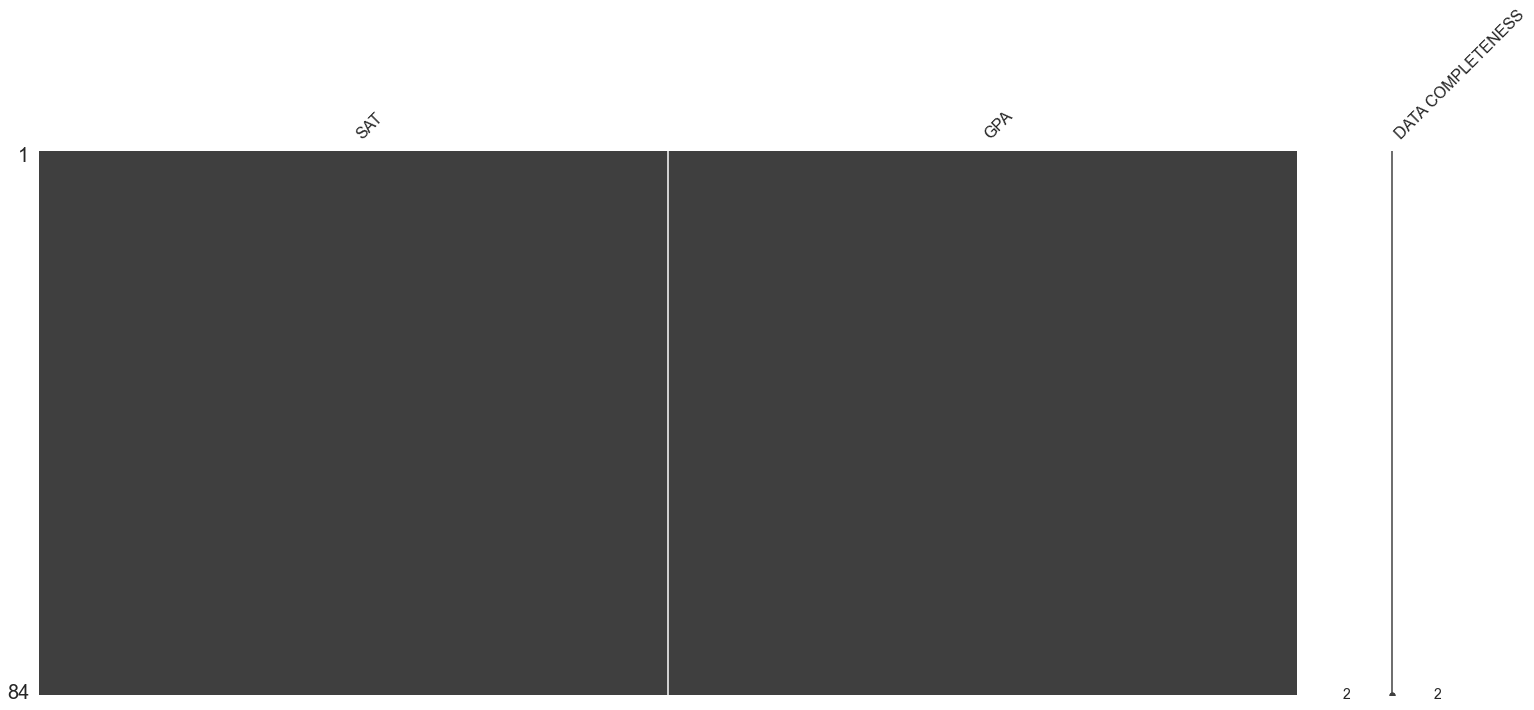

In [5]:
#Checking for missing values using visualization
msno.matrix(df=df,
            labels=True)

In [6]:
df.describe(include='all')

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


#### Some data visualization 

array([[<AxesSubplot:title={'center':'SAT'}>,
        <AxesSubplot:title={'center':'GPA'}>]], dtype=object)

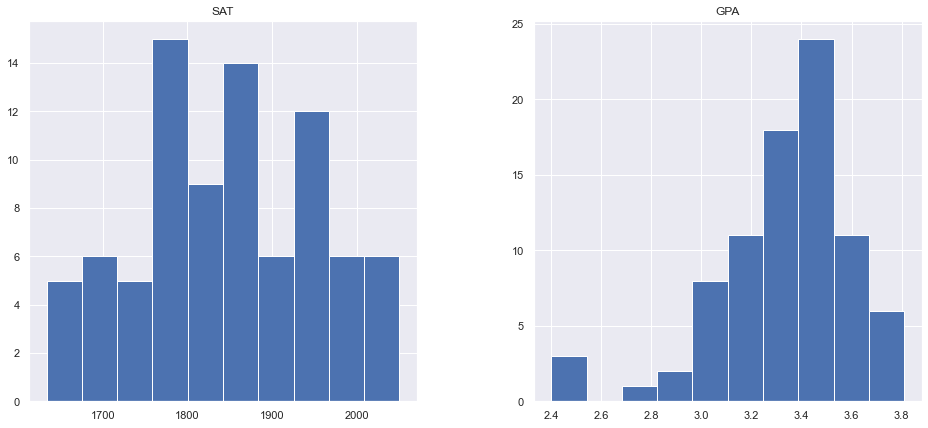

In [7]:
df.hist(figsize=(16,7))

In [8]:
from scipy import stats
stats.skew(df['SAT']), stats.skew(df['GPA'])

(0.041778706061156114, -1.0832176206045383)

##### From the histograms above
- The SAT scores are approximately symmetric
- The GPAs are somewhat skewed (negatively)
- There are no significant outliers

Text(0.5, 1.0, 'SAT Scores versus GPA')

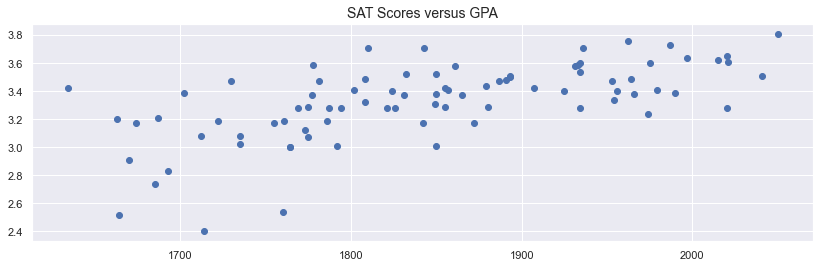

In [9]:
plt.figure(figsize=(14,4))
plt.scatter(x=df['SAT'],
            y=df['GPA'])
plt.title("SAT Scores versus GPA",
          fontsize=14)

##### From the scatter-plot above 
- SAT and GPA have a linear relationship
###### The assumption of Linearity is met by the data. 
[Other assumptions of linear Regression](https://www.k2analytics.co.in/assumptions-of-linear-regressions-part-2/)

The data is clean and we can move to preprocessing.                                                                    
Since there is just one predictor (x) variable, standardization won't be of significant use.

#### Splitting the data into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['SAT'],
                                                    df['GPA'],
                                                    test_size=0.3,
                                                    random_state=42)

### The simple linear regression

The simple linear regression is in the form

$ Y_{i} = \beta_{0} + \beta_{1}x_{i} + e_{i}$                                                                                 
where; 

$Y_{i}$  = dependent/predicted variable

$\beta_{0}$  = bias/intercept on the y-axis 

$\beta_{1}$  = slope/coefficent of independent variable

$x_{i}$  = independent variable

$e_{i}$  = error-term

The slope and bias of the regression can be calculated using the formulas below.

$\beta_{1} = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$

$\beta_{0} = \bar{y}-\beta_{1}\bar{x}$

where $\bar{x}$ and $\bar{y}$ are the mean values of the independent and dependent variables respectively.

## Building the model manually
###### (without external libraries)

While creating the function below, I noticed that the function can be put in a Linear model class

Check this repo containing this notebook for the refactored code

In [11]:
def list_validated(list_1,list_2)->bool:
    """
    returns true if the two list elements are numeric and are of equal length
    
    :param list_1,list_2: list objects
    
    """
    lists_sum = list_1+list_2
    all_int = all(isinstance(x, (int,float)) for x in lists_sum)
    equal_length = len(list_1)==len(list_2)

    return (all_int & equal_length)

   

In [12]:
def timing_decorator(func):
    """
    returns a wrapper function
    
    :param func: function object,function to be decorated
    """
    import time
    def wrapping_func(*args, **kwargs):
        start_time = time.time()
        temp =  func(*args, **kwargs)
        print("--- %s seconds ---" % (time.time() - start_time))
        return temp
    return wrapping_func


In [13]:
@timing_decorator
def linear_model_1(x_train, y_train)->list:
    """
    returns list object containing regression slope and bias 
    
    :param x_train: list object, independent variables of length j
    :param y_train: list object, dependent variables of length j
     
    """
    x, y = list(x_train), list(y_train)
    #validate x and y
    if list_validated(x_train, y_train):
        import statistics
        x_bar = statistics.mean(x)
        y_bar = statistics.mean(y)
        
        slope_num = 0                         
        slope_den = 0                        
        
        for i in range(len(x)):
            a = x[i]-x_bar
            slope_num += a*(y[i]-y_bar)
            slope_den += a**2
            
        slope = slope_num/slope_den
        bias = y_bar - (slope*x_bar)
        return [bias,slope]
    return("inputs do not meet the criteria")

In [14]:
SAT_GPA_model = linear_model_1(X_train,y_train)
SAT_GPA_model

--- 0.05220389366149902 seconds ---


[0.44357460445431895, 0.0015737740293184433]

### Building the model using numpy

In [15]:
@timing_decorator
def linear_model_2(x_train,y_train):
    """
    returns numpy n-dimensional array object containing regression slope and bias 
    
    :param x_train: list object, independent variables of length j
    :param y_train: list object, dependent variables of length j
     
    """
    
    if len(x_train.shape) < 2:
        print("Reshaping x_train array...")
        x_train = x_train.values.reshape(x_train.shape[0], 1)
        print("x_train reshaped!")

    if len(y_train.shape) < 2:
        print("Reshaping observations array...")
        y_train = y_train.values.reshape(y_train.shape[0], 1)
        print("y_train reshaped!")

    x_bar = np.mean(x_train)
    y_bar = np.mean(y_train)
    
    slope_num = np.sum((x_train-x_bar)*(y_train-y_bar))
    slope_den = np.sum((x_train-x_bar)**2)
    
    slope = slope_num/slope_den
    bias = y_bar - (slope*x_bar)
    
    return [bias,slope]

SAT_GPA_model_2 = linear_model_2(X_train,y_train)
SAT_GPA_model_2

Reshaping x_train array...
x_train reshaped!
Reshaping observations array...
y_train reshaped!
--- 0.0005581378936767578 seconds ---


[0.44357460445431807, 0.0015737740293184437]

###### $!$ $!$ $!$ Using numpy arrays made our execution time 10 times faster $!$ $!$ $!$

### Building the model using statsmodels

In [16]:
x = sm.add_constant(X_train)
sm_sat_gpa_model = sm.OLS(y_train,x).fit()
bias = sm_sat_gpa_model.params[0]
slope = sm_sat_gpa_model.params[1]

In [17]:
print(sm_sat_gpa_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     37.32
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.01e-07
Time:                        20:16:41   Log-Likelihood:                 9.6391
No. Observations:                  58   AIC:                            -15.28
Df Residuals:                      56   BIC:                            -11.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4436      0.475      0.933      0.3

### Building the model using sklearn

In [18]:
y_train = y_train.values.reshape(-1, 1)
X_train = X_train.values.reshape(-1, 1)
sk_sat_gpa_model = LinearRegression()
sk_sat_gpa_model = sk_sat_gpa_model.fit(X_train, y_train)

bias = sk_sat_gpa_model.intercept_
slope = sk_sat_gpa_model.coef_[0]
bias,slope

(array([0.4435746]), array([0.00157377]))

##### Lets see how well how model fits the datapoints
The result from three models give us the same values for our bias (0.4435746) and slope (0.001573774)

Text(0.5, 1.0, 'Chart showing scatter-plot and line of best fit')

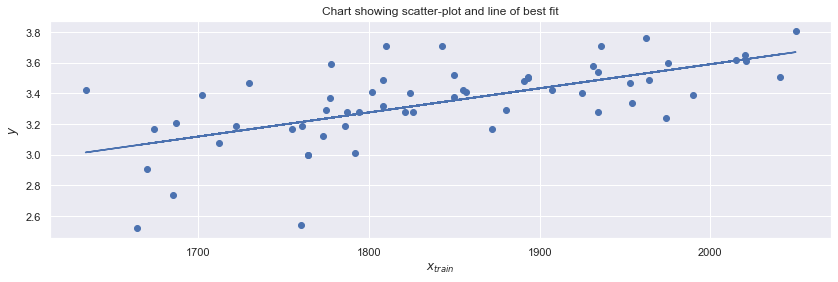

In [19]:
bias = 0.4435746
slope = 0.001573774
fig_scat, ax_scat = plt.subplots(1,1, figsize=(14,4))

best_fit_line = bias + slope * X_train

ax_scat.scatter(X_train, y_train, label='Training Data')
ax_scat.plot(X_train, best_fit_line, ls='-', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$')
ax_scat.set_title('Chart showing scatter-plot and line of best fit')